# 국가별 GDP와 스타벅스 매장수의 상관관계 분석
Differences between Starbucks Stores by Gross Domestic Product

Kaggle에 업로드된 2017년 기준 국가별 스타벅스 매장의 개수를 정리하여 올려둔 데이터셋과 OECD 에서 직접 제공하고 있는 국가별 GDP 데이터를 활용하여 스타벅스 매장 수와 GDP 연계성을 찾아보는 것이 이번 프로젝트의 주 목적이다.

## 기여자
- 김연규 ([Github](https://github.com/code-yeongyu)) : 데이터 전처리 담당
- 박인성 ([Gihtub](https://github.com/insung3511])) : 데이터 분석 및 보고서 작성

# 목차
1. 데이터셋 파악
2. 가설
3. 데이터 전처리
4. 데이터 분석
5. 최종 분석
6. 마무리

# 1. 데이터셋 파악
## 1-1. 데이터셋의 각 출처
Starbucks Locations Dataset : https://www.kaggle.com/starbucks/store-locations
Gross Domestic Product (GDP) : https://data.oecd.org/gdp/gross-domestic-product-gdp.htm

## 1-1-1. 스타벅스 데이터셋의 각 컬럼별 분석
- Brand : 각 스타벅스 매장별 브랜드 (스타벅스가 인수한 매장도 포함됨)
- Store Number : 각 스타벅스 매장별 고유 번호
- Store Name : 각 스타벅스 매장별 이름 (ex 스타벅스 남영점)
- Street Address : 각 스타벅스 매장 위치
- City : 각 스타벅스 매장의 도시 위치
- State/Province : 각 스타벅스 매장의 주
- Country : 각 스타벅스 매장이 위치한 국가
- Postcode : 각 스타벅스 매장별 우편번호
- Timezone : 각 스타벅스 매장별 시간대
- Longitude : 각 스타벅스 매장별 경도 좌표
- Latitude : 각 스타벅스 매장별 위도 좌표

## 1-1-2. GDP 데이터셋의 각 칼럼별 분석
- LOCATION : 국가
- INDICATOR : 경제 지표
- SUBJECT : 계요
- MEASURE : GDP 측정 단위
- FREQUENCY : **확인불가**
- TIME : 데이터 시간별
- Value : 각 국가별 실질적 GDP 값 (단위 : USD)
- Flag Codes : **확인불가**

# 2. 가설
- GDP가 높을수록 스타벅스 매장 수가 많을 것이다.
- 반대로 GDP가 낮을수록 스타벅스 매장 수는 적을 것이다.

# 2-1. 의문
- 국가 내에 한 도시에만 스타벅스가 밀집 되어 있는가?
- 아시아권 국가와 미국/유럽권 국가에서의 스타벅스 매장 차이는 얼마나 차이가 나는가

-----
# 3. 데이터 전처리

## 데이터셋 배경
### GDP Dataset
GDP 데이터셋은 OECD에서 공개하고 있는 데이터셋이다. 시기는 스타벅스 데이터셋에 맞게 2017년으로 지정을 하였다. 

### Starbucks Dataset
데이터셋에서는 2017년까지 운영되고 있는 **매장의 수는 25,364 개**의 매장을 운영하였으며 운영되고 있는 매장 중에서 47%는 본사 직영 매장이고 37%는 계약을 통한 운영이 되고 있으며 나머지 17%는 여러 방면으로 운영이 되고 있다. 

현재 이 데이터셋에서는 스타벅스가 인수한 회사인 Teavana 도 포함이 되어 있지만 그에 데이터셋은 1% 이하의 매장을 소유하고 있기 때문에 프로젝트 진행에 큰 문제가 되진 않는다. 또한 Teavana도 스타벅스의 매장에 포함이 되기 때문에 합산하는 것이 맞다고 판단 되었다.


데이터 분석을 위한 Pandas 모듈을 끌어오며, country_converter 모듈을 활용하여 Starbucks 데이터셋과 GDP 데이터셋에서의 국가의 데이터의 차이점을 잡아준다. Starbucks 데이터셋에서 국가가 KR 로 되어있다면 GDP 데이터셋에서는 KOR 와 같이 되어 있어 이를 잡아주는 과정이 필요하다. 이를 country_converter 모듈을 활용하여 하나로 통일해준다.

코드를 실행전 country_converter 모듈과 데이터셋을 wget 명령어와 pip 명령어를 통해서 다운로드 및 설치가 필요하다. 그에 해당하는 명령어는 아래와 동일하다.

In [ ]:
!pip install country-converter
!pip install pycountry-convert
!pip install squarify
!pip install folium
!pip install pygal

In [ ]:
!rm -rf gdp* && rm -rf starbucks* && rm -rf worldcities*
!wget https://raw.githubusercontent.com/insung3511/2021-bigdata-class-report/master/dataset/gdp_2017.csv
!wget https://raw.githubusercontent.com/insung3511/2021-bigdata-class-report/master/dataset/starbucks_2017.csv
!wget https://raw.githubusercontent.com/insung3511/2021-bigdata-class-report/master/dataset/worldcities.csv
!ls

--2021-06-22 14:39:34--  https://raw.githubusercontent.com/code-yeongyu/2021-bigdata-class-report/master/gdp_2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3341 (3.3K) [text/plain]
Saving to: ‘gdp_2017.csv’

gdp_2017.csv        100%[===================>]   3.26K  --.-KB/s    in 0s      

2021-06-22 14:39:34 (38.7 MB/s) - ‘gdp_2017.csv’ saved [3341/3341]

--2021-06-22 14:39:35--  https://raw.githubusercontent.com/code-yeongyu/2021-bigdata-class-report/master/starbucks_2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

해주는 김에 이것도 해주자.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import country_converter as coco
import matplotlib.pyplot as plt
from folium import LayerControl
from pygal.style import Style
from folium import plugins
import squarify as sf
import seaborn as sns
import pandas as pd
import numpy as np
import pycountry
import random
import folium

plt.rc('font', family='NanumBarunGothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

위에 국가 코드 문제를 해결하기 위해 *iso2_to_iso3* 함수를 만들어 2자리로 되어있는 국가 약자를 3자리로 바꿀 함수를 만들어준다.

In [ ]:
def iso2_to_iso3(iso2):  # country code converter
    return coco.convert(names=[iso2], to='ISO3')

In [ ]:
# read csvs
gdp = pd.read_csv("./gdp_2017.csv")
starbucks = pd.read_csv("./starbucks_2017.csv")

gdp_filtered 는 데이터 분석에서 필요한 전처리를 한 데이터프레임이다.
허나 starbucks_filtered는 필요한 정보를 담아온 후에 한번의 더 전처리 과정이 필요하다. 국가별 매장의 수와 국가 코드에 다름에 따라 한번 이를 정리를 해줘야 하기 때문이다. 

6번 라인에 있는 starbucks_country_code_fixed는 데이터프레임으로 바꾸기 이전의 임시 저장소이다. 7번 라인에서 국가코드의 문제를 해결해주고 8번 라인에서 각 국가별 매장의 수를 확인하는데 매장의 수는 9번 라인에서 for 루프를 통해서 매장의 개수를 세준다.

최종적으로 위 과정을 거친 후에는 starbucks_df 로 전처리가 완료된 스타벅스 매장 데이터셋의 최종 결과물이 나오게된다. 

In [ ]:
gdp_df = pd.DataFrame((gdp[['LOCATION', 'Value']]))
gdp_df = gdp_df.sort_values(by=['Value'], ascending=False)
starbucks_filtered = starbucks.groupby('Country')[['Store Number']].nunique()

stores = starbucks_filtered['Store Number']

starbucks_country_code_fixed = [{
   "LOCATION": iso2_to_iso3(key),
   "stores_cnt": stores[key],
} for key in stores.keys()]

starbucks_df = pd.DataFrame(starbucks_country_code_fixed)

result는 GDP와 starbucks 데이터셋을 합친 최종 결과물이다. 각 국가별 GDP 와 각 국가별 스타벅스 매장의 수이다. 

출력 기준은 gdp 순으로 출력을 했을때 아래와 같은 결과물을 보게 된다.

In [ ]:
result = pd.merge(
    gdp_df,
    starbucks_df,
    left_on='LOCATION',
    right_on='LOCATION',
    how='inner',
)

# nation
result = result.sort_values(by=['Value'], ascending=False)
result.head(15)

,LOCATION,Value,stores_cnt
0,LUX,112187.731906,2
1,SGP,94945.250892,130
2,IRL,78739.398464,73
3,CHE,69103.567686,61
4,NOR,64050.366694,17
5,USA,60091.568784,13608
6,DNK,55356.490090,21
7,NLD,55089.581430,59
8,AUT,54185.337013,18
9,DEU,52952.897774,160


각 도시별 기준으로 스타벅스의 매장수의 숫자를 구하게 되면 다음과 같은 결과가 나오게 된다.

In [ ]:

# city
starbucks_city = starbucks.groupby('City')[['Store Number']].nunique()
starbucks_city = starbucks_city.sort_values(by=['Store Number'], ascending=False)
starbucks_city = pd.DataFrame(starbucks_city)

starbucks_city.head(10)

,Store Number
City,
上海市,542
Seoul,242
北京市,234
New York,232
London,216
Toronto,192
Mexico City,180
Chicago,180
Seattle,156


## 가장 스타벅스가 많은 국가는 어디인가?

In [ ]:
result = result.sort_values(by=['stores_cnt'], ascending=False)
result.head(15)

,LOCATION,Value,stores_cnt
5,USA,60091.568784,13608
39,CHN,14306.396116,2734
13,CAN,48316.716527,1468
19,JPN,40992.393230,1237
20,KOR,40957.347064,992
16,GBR,45757.778123,901
36,MEX,19947.197691,579
29,TUR,28193.061398,326
41,IDN,11050.882373,268
9,DEU,52952.897774,160


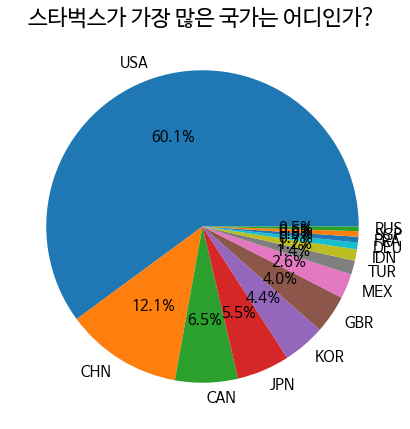

In [ ]:
result_for_pie = result.drop(result.index[13:])

plt.title('스타벅스가 가장 많은 국가는 어디인가?', fontsize=22)
plt.rcParams['figure.figsize'] = [7, 12]
plt.pie(result_for_pie['stores_cnt'].to_numpy().tolist(), labels=result_for_pie['LOCATION'].to_numpy().tolist(),  autopct="%.1f%%", textprops={'fontsize': 15})
plt.show()

## 가장 스타벅스가 많은 도시는 어디인가?


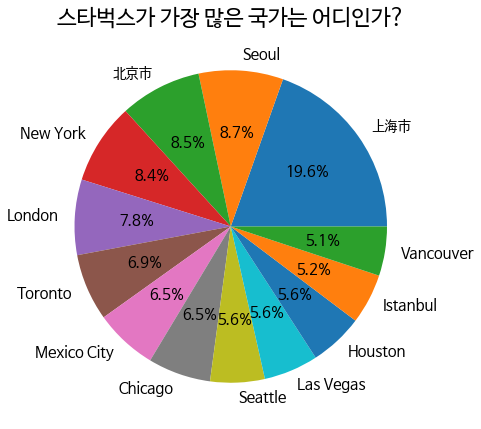

In [ ]:
#starbucks_city.head()
city_result_for_pie = starbucks_city.drop(starbucks_city.index[13:])
city_result_for_pie['City'] = city_result_for_pie.index
city_result_for_pie.head()

plt.title('스타벅스가 가장 많은 국가는 어디인가?', fontsize=22)
plt.rcParams['figure.figsize'] = [7, 12]
plt.pie((city_result_for_pie['Store Number'].to_numpy().tolist()), labels=(city_result_for_pie['City']).to_list(),  autopct="%.1f%%", textprops={'fontsize': 15})
plt.show()

## 가장 스타벅스가 적은 국가는 어디인가?

In [ ]:
#result_for_pie = result.drop(result.index[13:])
less_starbucks_country = result.sort_values(by=['stores_cnt'], ascending=True)
less_starbucks_country.head(13)

,LOCATION,Value,stores_cnt
0,LUX,112187.731906,2
40,ZAF,12810.965544,3
25,SVK,30082.484108,3
34,BGR,21387.279564,5
15,FIN,47570.270354,8
42,MAR,7581.215412,9
23,CYP,38050.911642,10
35,CRI,20368.230268,11
38,COL,14479.812544,11
24,PRT,33044.700150,11


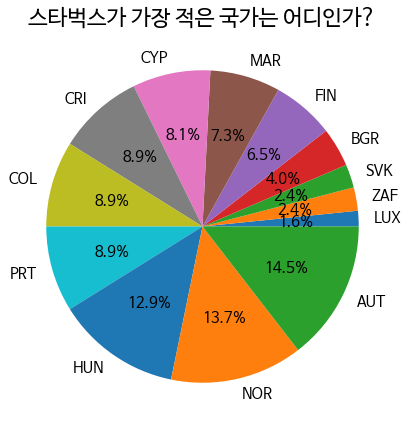

In [ ]:
less_result_for_pie = less_starbucks_country.drop(less_starbucks_country.index[13:])

plt.title('스타벅스가 가장 적은 국가는 어디인가?', fontsize=22)
plt.rcParams['figure.figsize'] = [7, 12]
plt.pie(less_result_for_pie['stores_cnt'].to_numpy().tolist(), labels=less_result_for_pie['LOCATION'].to_numpy().tolist(),  autopct="%.1f%%", textprops={'fontsize': 15})
plt.show()


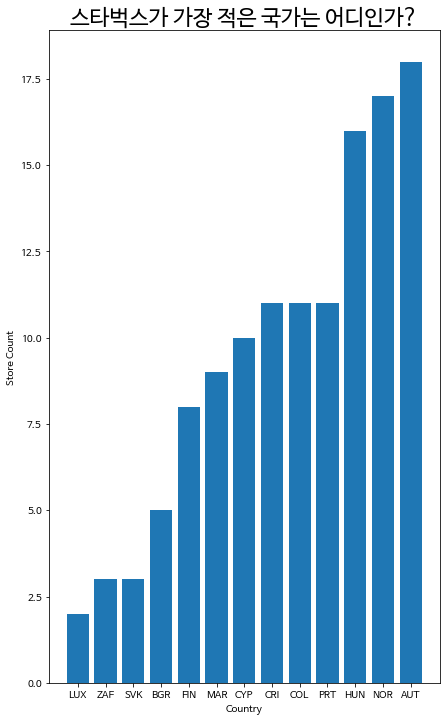

In [ ]:
plt.title('스타벅스가 가장 적은 국가는 어디인가?', fontsize=22)
plt.rcParams['figure.figsize'] = [7, 12]
plt.xlabel('Country')
plt.ylabel('Store Count')
plt.bar(less_result_for_pie['LOCATION'].to_numpy().tolist(), less_result_for_pie['stores_cnt'].to_numpy().tolist())
plt.show()

-----
## 4-2. GDP 데이터셋 분석
GDP 데이터셋 같은 경우는 칼럼이 많지가 않았다. 필요한 칼럼으로는 국가 칼럼과 각 국가별에 해당되는 GDP 칼럼만 필요하기 때문이다. 때문에 이를 데이터 전처리 과정에서 모두 진행하여 분석 과정에는 크게 건들 필요가 없다.


## GDP 경제률이 가장 높은 국가는 어디인가?

In [ ]:
gdp_df.head(13)

,LOCATION,Value
16,LUX,112187.731906
58,SGP,94945.250892
12,IRL,78739.398464
26,CHE,69103.567686
20,NOR,64050.366694
29,USA,60091.568784
55,HKG,59846.819225
11,ISL,55638.491978
5,DNK,55356.490090
18,NLD,55089.581430


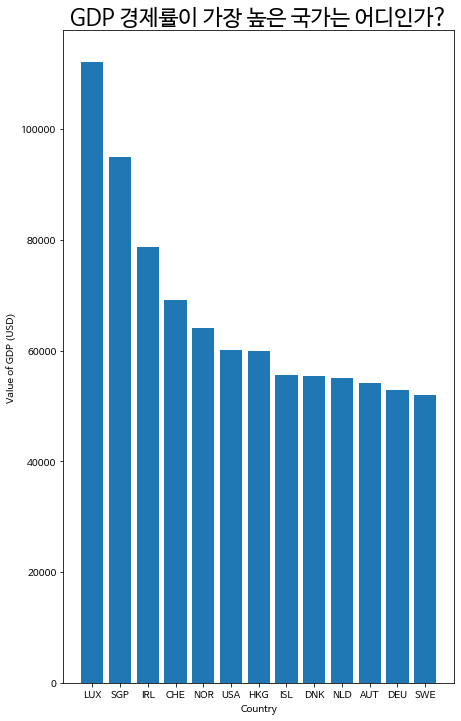

In [ ]:
gdp_for_bar = gdp_df.drop(gdp_df.index[13:])

plt.title('GDP 경제률이 가장 높은 국가는 어디인가?', fontsize=22)
plt.xlabel('Country')
plt.ylabel('Value of GDP (USD)')
plt.bar(gdp_for_bar['LOCATION'].to_numpy().tolist(), gdp_for_bar['Value'].to_numpy().tolist())
plt.show()

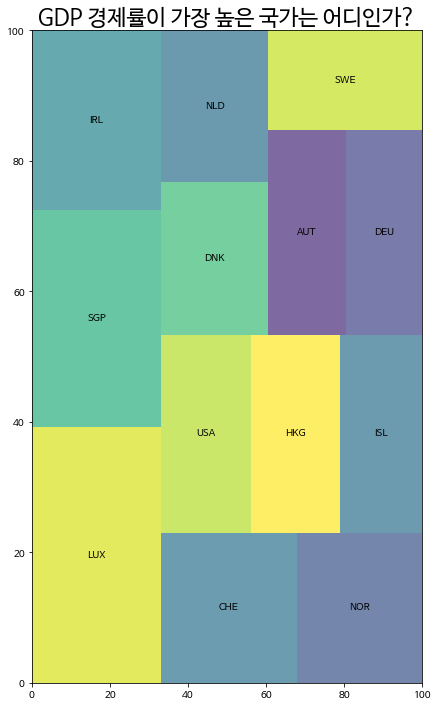

In [ ]:
gdp_for_bar = gdp_df.drop(gdp_df.index[13:])

plt_color = []

rgbl=[255,0,0]

plt.title('GDP 경제률이 가장 높은 국가는 어디인가?', fontsize=22)
sf.plot(sizes=gdp_for_bar['Value'].to_numpy().tolist(), 
        label=gdp_for_bar['LOCATION'].to_numpy().tolist(),
        color=random.shuffle(rgbl),
        alpha=0.7)
plt.axis()
plt.show()

## GDP 경제률이 가장 높은 국가는 어디인가?

In [ ]:
small_gdp_df = gdp_df.sort_values(by=['Value'], ascending=True)
small_gdp_df.head(13)

,LOCATION,Value
56,MDG,1601.521574
54,ZMB,3484.940724
57,MAR,7581.215412
34,IDN,11050.882373
38,ZAF,12810.965544
31,CHN,14306.396116
32,COL,14479.812544
42,BRA,14596.889676
53,MKD,15706.430869
17,MEX,19947.197691


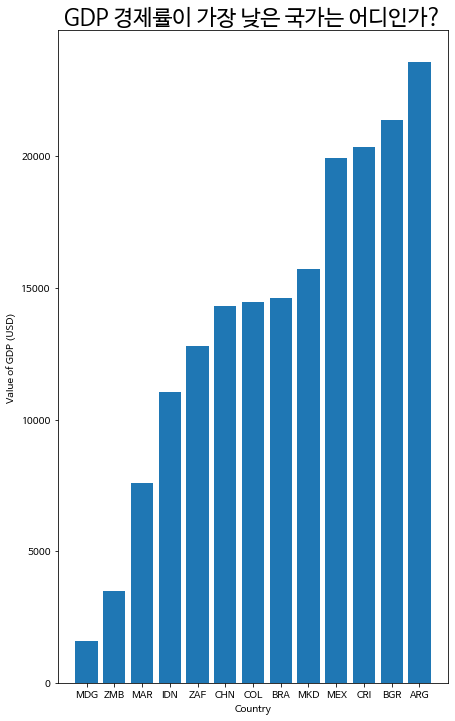

In [ ]:
small_gdp_for_bar = small_gdp_df.drop(small_gdp_df.index[13:])

plt.title('GDP 경제률이 가장 낮은 국가는 어디인가?', fontsize=22)
plt.xlabel('Country')
plt.ylabel('Value of GDP (USD)')
plt.bar(small_gdp_for_bar['LOCATION'].to_numpy().tolist(), small_gdp_for_bar['Value'].to_numpy().tolist())
plt.show()

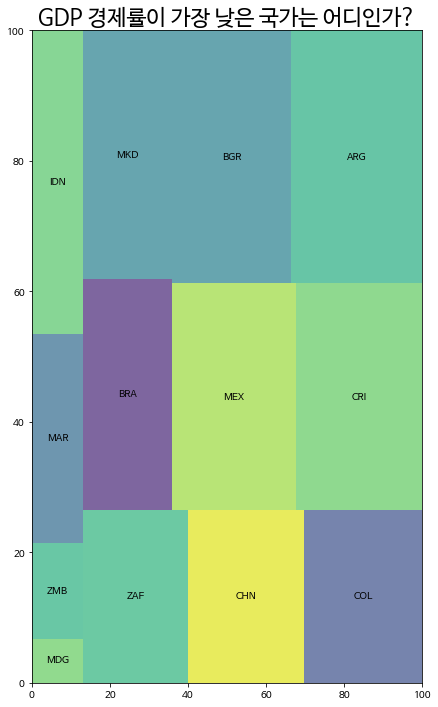

In [ ]:
plt_color = []

rgbl=[255,0,0]

plt.title('GDP 경제률이 가장 낮은 국가는 어디인가?', fontsize=22)
sf.plot(sizes=small_gdp_for_bar['Value'].to_numpy().tolist(), 
        label=small_gdp_for_bar['LOCATION'].to_numpy().tolist(),
        color=random.shuffle(rgbl),
        alpha=0.7)
plt.axis()
plt.show()

-----
## 4-3. 스타벅스와 GDP 의 연계성 분석
위에서 쭉 분석한 스타벅스 데이터셋과 GDP 데이터셋의 연계성을 이제는 파악할 차례이다. 이전에 작성을 했던 가설에 있던 내용들이 맞는지를 확인을 할 차레인 것이다. 그럼 다시 위에서 작성 했던 가설들을 한번 끌어와서 확인을 하나하나 해보자.

### 가설
- GDP가 높을수록 스타벅스 매장 수가 많을 것이다.
- 반대로 GDP가 낮을수록 스타벅스 매장 수는 적을 것이다.

위에 가설을 하나하나 짚어가면서 최종적으로 데이터를 분석해보자.

## 4-3-1. "GDP가 높을수록 스타벅스 매장 수가 많을 것이다."

일단 가장 먼저 스타벅스 매장 수를 기준으로 내림차순 기준 배열을 해보자. 

In [ ]:
result.head(15)

,LOCATION,Value,stores_cnt
5,USA,60091.568784,13608
39,CHN,14306.396116,2734
13,CAN,48316.716527,1468
19,JPN,40992.393230,1237
20,KOR,40957.347064,992
16,GBR,45757.778123,901
36,MEX,19947.197691,579
29,TUR,28193.061398,326
41,IDN,11050.882373,268
9,DEU,52952.897774,160


사실상 위에 도표를 보면 아직 GDP 에 따른 스타벅스 매장 수의 연계성을 찾아볼수가 없다. GDP 에 따른 스타벅스의 연계성을 찾기에는 스타벅스의 매장 수를 기준으로 정렬을 하는 것 보다는 GDP 기준으로 정렬을 하는 것이 사실 그에 따른 결과를 찾아보기가 쉽다. 일단 그래도 한번 
정리된 데이터를 시각화 해보자.


True


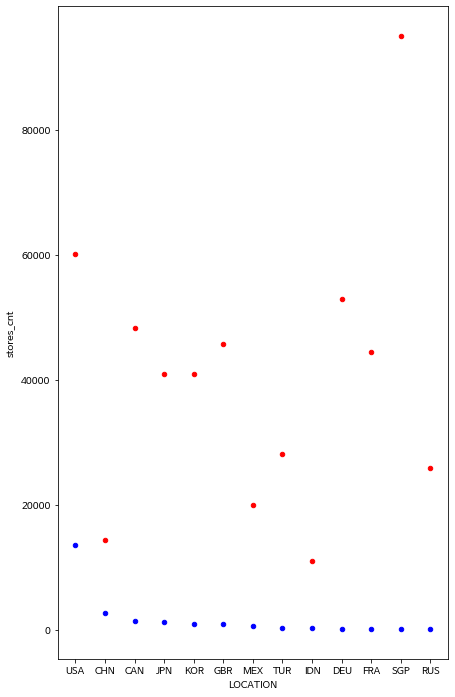

In [ ]:
result_for_scatter = result.drop(result.index[13:])

ax1 = result_for_scatter.plot(kind='scatter', x='LOCATION', y='Value', color='r')
ax2 = result_for_scatter.plot(kind='scatter', x='LOCATION', y='stores_cnt', color='b', ax=ax1)
print(ax1 == ax2)

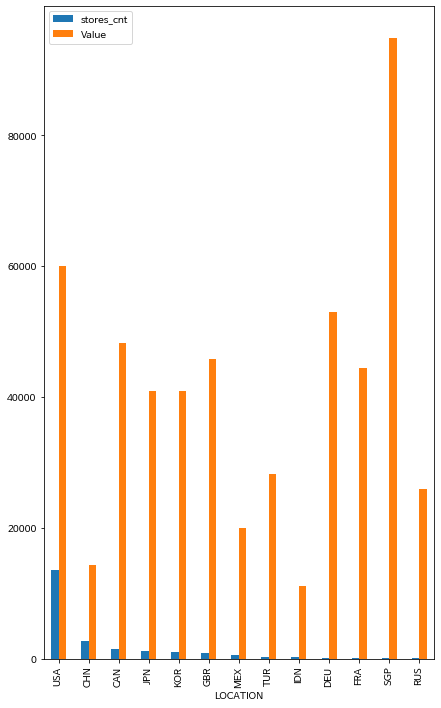

In [ ]:
result_for_scatter.plot(x="LOCATION", y=["stores_cnt", "Value"], kind="bar")
plt.show()

사실 이 데이터를 시각화 하기에는 stores_cnt (스타벅스 매장수) 칼럼과 Value (GDP 경제율(?)) 의 갭 차이가 너무 심하여 이를 한눈에 보기 좋은 시각화를 하기에는 힘들다. 

하지만 비교적으로 보기 좋게 만드는 방법은 매장의 수 기준이 아닌 GDP 기준으로 정렬을 하면 그나마 확인을 하기가 쉽다.

In [ ]:
less_result_for_scatter = result.sort_values(by=['Value'], ascending=False)
less_result_for_scatter.head(13)

less_result_for_scatter = less_result_for_scatter.drop(less_result_for_scatter.index[13:])

True


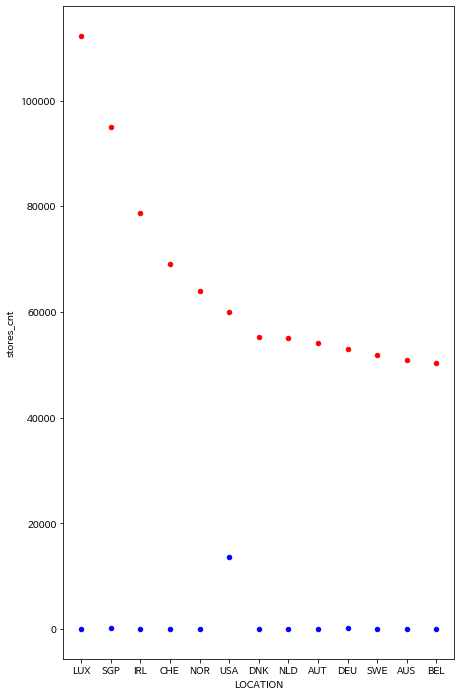

In [ ]:
ax1 = less_result_for_scatter.plot(kind='scatter', x='LOCATION', y='Value', color='r')
ax2 = less_result_for_scatter.plot(kind='scatter', x='LOCATION', y='stores_cnt', color='b', ax=ax1)
print(ax1 == ax2)

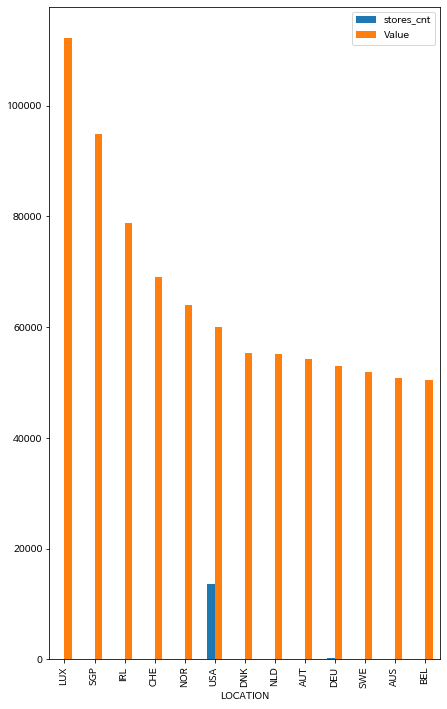

In [ ]:
less_result_for_scatter.plot(x="LOCATION", y=["stores_cnt", "Value"], kind="bar")
plt.show()

비교적으로 한눈에 보기가 쉽다. 2번째 시각화가 된 결과를 보면 우리는 전혀 관련이 없다는 사실을 확인을 할 수 있다. 사실 그래프는 그려졌으나 그의 수가 너무나도 미미하여 보이지도 않는다. 이를 보여주는 시각화가 1번째 Scatter 시각화 결과물이다.

위 시각화 결과물로 우리는 첫번째 가설인 "GDP가 높은 국가일수록 스타벅스의 매장 수가 많을 것이다." 라는 가설은 틀리게 되었다. 예외적인 결과로 USA가 있지만 그러기에는 나머지 12개국이 너무나도 미미하여 가설이 많다고 주장하기에는 어렵다.

그럼 두번째 가설인 "GDP가 낮을수록 스타벅스의 매장 수는 적을 것이다" 라는 가설을 확인해보자.

## 4-3-2. "GDP가 낮을수록 스타벅스 매장 수가 적을 것이다."

위 가설을 증명하기 위해서는 일단 가장 먼저 GDP가 낮은 순으로 정렬을 한 후에 인덱싱을 한 후에 스타벅스 매장 순으로 최종 정렬을 거칠 것이다.

In [ ]:
rewind_result = result.sort_values(by=['Value'], ascending=True)
rewind_result = rewind_result.drop(rewind_result.index[13:])

store_rewind_result = rewind_result.sort_values(by=['stores_cnt'], ascending=True)
value_rewind_result = rewind_result.sort_values(by=['Value'], ascending=True)

In [ ]:
value_rewind_result.head()

,LOCATION,Value,stores_cnt
42,MAR,7581.215412,9
41,IDN,11050.882373,268
40,ZAF,12810.965544,3
39,CHN,14306.396116,2734
38,COL,14479.812544,11


GDP 가 낮은 순으로 정리가 되었다. 한번 시각화를 통해서 이를 확인해보자.

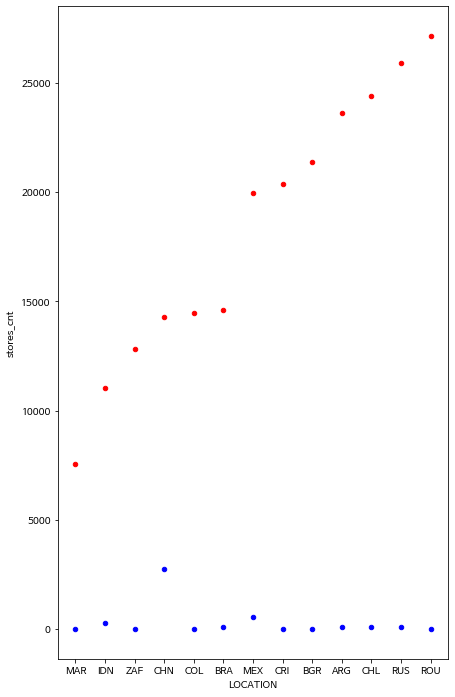

In [ ]:
ax1 = value_rewind_result.plot(kind='scatter', x='LOCATION', y='Value', color='r')
ax2 = value_rewind_result.plot(kind='scatter', x='LOCATION', y='stores_cnt', color='b', ax=ax1)

plt.show()

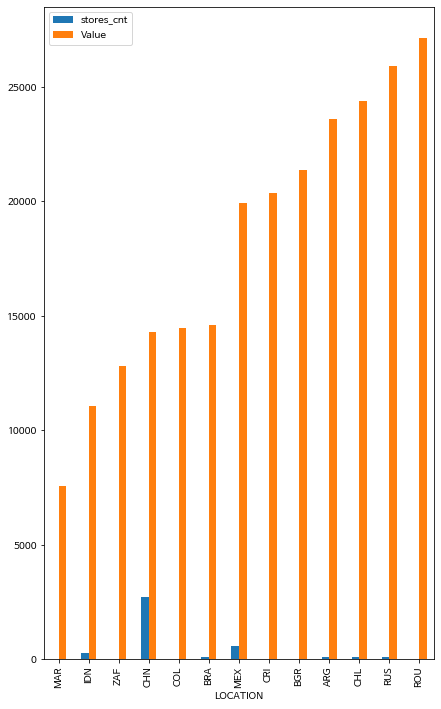

In [ ]:
value_rewind_result.plot(x="LOCATION", y=["stores_cnt", "Value"], kind="bar")
plt.show()

GDP 경제율 기준으로 정렬하여 보았을때에는 중간 중간에 비교적으로 높은 국가들이 있어 확신을 갖기에는 이른 감이 있다. 다시 그럼 매장수 기준으로 정렬을 하여 보자.

In [ ]:
store_rewind_result.head(13)

,LOCATION,Value,stores_cnt
40,ZAF,12810.965544,3
34,BGR,21387.279564,5
42,MAR,7581.215412,9
38,COL,14479.812544,11
35,CRI,20368.230268,11
30,ROU,27136.073190,27
32,CHL,24402.005375,96
37,BRA,14596.889676,102
33,ARG,23597.117759,108
31,RUS,25926.431403,109


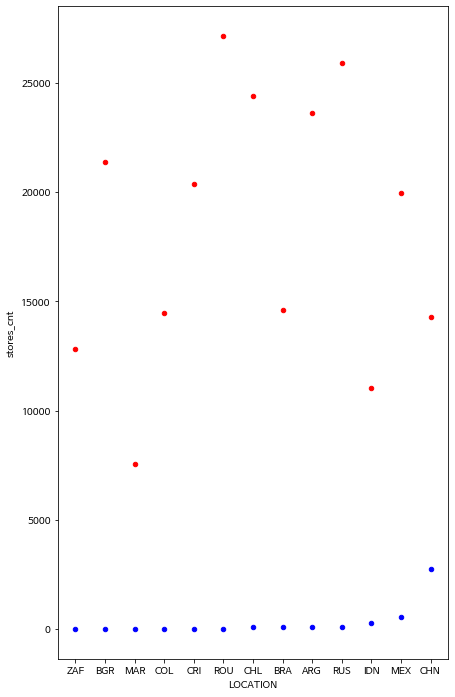

In [ ]:
ax1 = store_rewind_result.plot(kind='scatter', x='LOCATION', y='Value', color='r')
ax2 = store_rewind_result.plot(kind='scatter', x='LOCATION', y='stores_cnt', color='b', ax=ax1)

plt.show()

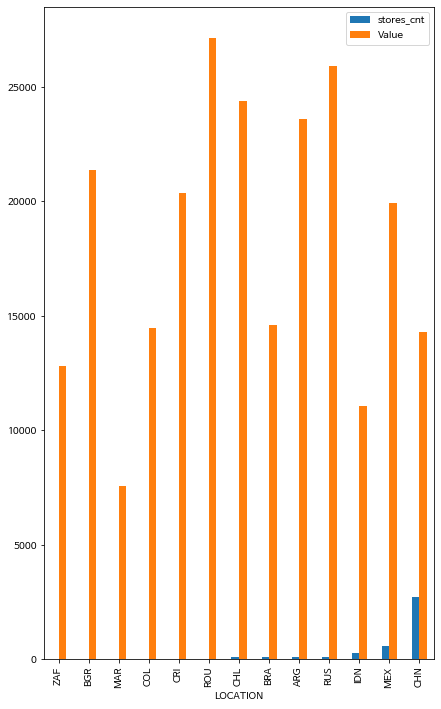

In [ ]:
store_rewind_result.plot(x="LOCATION", y=["stores_cnt", "Value"], kind="bar")
plt.show()

**혼란스럽다**. 전혀 예상을 못했다. 이렇게 까지 들쑥날쑥 할지는 몰랐다. 

일단 확실한거는 연계성은 없다는 점이다. 비교적 GDP가 높은 국가인 로마니아에서는 27개 밖에 없다. 하지만 로미나아보다 매장이 가장 많고 미국 다음으로 두번째로 매장이 많은 중국은 GDP가 낮지만 스타벅스 매장이 굉장히 많다는 점을 확인 할 수 있다. 결론적으로 우리는 스타벅스와 GDP의 연계성을 전혀 찾을 수 없다는 것을 확인 함과 동시에 스타벅스가 경제의 상징이라는 것을 빅데이터를 통해 틀렸다는 것을 확인 할 수 있었다.

-----
## 5. 최종 분석
***위 과정을 통해서 두개의 가설이 틀렸다는 것을 확인을 하였다. 또한 스타벅스와 GDP 즉, 국가경제성장률과는 전혀 무관함을 확인하였다.***

그렇다면 GDP가 높은 국가들은 주로 어떤 국가들이고 그 국가들의 특징들, 그리고 스타벅스의 매장 수가 높은 국가들은 주로 어떤 국가들이 있는지 분석을 하고 마무리 하겠다. 추가활동으로는 스타벅스 도시별 매장 수를 확인하며 스타벅스 매장 수가 높은 국가들과의 연계성을 간단히 다뤄보면서 진짜로 마무리 하겠다.

### 5-1. GDP가 높은 국가들
위에서 사용했던 데이터셋을 끌어와 어떤 국가들이 있는지 확인해보자.

In [ ]:
less_result_for_scatter.head(13)

,LOCATION,Value,stores_cnt
0,LUX,112187.731906,2
1,SGP,94945.250892,130
2,IRL,78739.398464,73
3,CHE,69103.567686,61
4,NOR,64050.366694,17
5,USA,60091.568784,13608
6,DNK,55356.490090,21
7,NLD,55089.581430,59
8,AUT,54185.337013,18
9,DEU,52952.897774,160


상위 5개국들을 주로 어떤 국가인지를 확인해보자. 



In [ ]:
starbucks_country_less_list = less_result_for_scatter['LOCATION'].to_numpy().tolist()

full_names = {}
for country in pycountry.countries:
  full_names[country.alpha_3] = country.name
  
codes = [full_names.get(country, 'Unknown code') for country in starbucks_country_less_list]
codes_df = pd.DataFrame(codes)
codes_df.head()

,0
0,Luxembourg
1,Singapore
2,Ireland
3,Switzerland
4,Norway


룩센부르크, 싱카포르, 아일랜드, 스코츠랜드 마지막으로 노르웨이가 상위 5개국에 속하게 되었다. 이들의 특징은 싱카포르를 제외하고는 모두 유럽에 해당하는 국가들이다. 공통점이라고 하면 모두 외각에 동떨어졌다고 볼만한 국가들이다. 

그렇다면 반대로 스타벅스가 많은 국가들은 어떤 나라가 있을까?

In [ ]:
starbucks_country_many_list = result_for_pie['LOCATION'].to_numpy().tolist()

full_names = {}
for country in pycountry.countries:
  full_names[country.alpha_3] = country.name
  
codes = [full_names.get(country, 'Unknown code') for country in starbucks_country_many_list]
codes_df = pd.DataFrame(codes)
codes_df.head()

,0
0,United States
1,China
2,Canada
3,Japan
4,"Korea, Republic of"


미국, 중국, 캐나다, 일본 그리고 한국이 있다. 미국 같은 경우에는 GDP 경제 성장률 6위에 속할 만큼 사실상 GDP 또한 국가라고 볼수 있으나 스타벅스 자체가 미국에서 시작을 했으니 이는 당연히 많을 수 밖에 없다고 본다. 

스타벅스가 가장 많은 국가의 특징들은 미국과 캐나다를 제외하고 3개국은 모두 아시아 국가에 해당이 된다. 그렇다면 도시별 스타벅스 매장에서는 가장 많은 국가가 어디일까.

In [ ]:
city_result_for_pie.head(5)

,Store Number,City
City,,
上海市,542,上海市
Seoul,242,Seoul
北京市,234,北京市
New York,232,New York
London,216,London


상하이, 서울, 베이징, 뉴욕, 런던이다. 진짜 혼란스럽다. 

상하이, 서울, 베이징, 뉴욕은 위에서 가장 스타벅스가 많은 국가에 해당이 되었으나 런던 같은 경우에는 가장 적은 국가의 부류에 속하기 때문이다. 위에서 우리는 주로 유럽권 국가들이 스타벅스 매장이 적다고 판단을 했기 때문이다. 그렇다면 런던 즉, 영국은 몇위 일까.

In [ ]:
result.head(10)

,LOCATION,Value,stores_cnt
5,USA,60091.568784,13608
39,CHN,14306.396116,2734
13,CAN,48316.716527,1468
19,JPN,40992.393230,1237
20,KOR,40957.347064,992
16,GBR,45757.778123,901
36,MEX,19947.197691,579
29,TUR,28193.061398,326
41,IDN,11050.882373,268
9,DEU,52952.897774,160


재미있게도 한국 바로 다음 6위 이다. 당연한 얘기 이겠지만 각 국가와 각 도시의 스타벅스 매장 수는 연관성이 있음을 확실히 확인을 하였다. 하지만 여기서 주의를 해야 할 점은 국가별 기준으로 보았을때 사실 중국보다 10,000 여개 이상의 매장을 갖고 있다. 그럼에도 불구하고 도시별 기준에서는 중국이 미국을 뛰어 넘었는지 의문점을 갖을 수 있다. 다시 도시별 데이터를 살펴보자.

In [ ]:
city_result_for_pie.head(10)

,Store Number,City
City,,
上海市,542,上海市
Seoul,242,Seoul
北京市,234,北京市
New York,232,New York
London,216,London
Toronto,192,Toronto
Mexico City,180,Mexico City
Chicago,180,Chicago
Seattle,156,Seattle


보다 시피 미국은 주 단위로 끊어져서 나온다. 즉, 상하이 라는 하나의 시를 말하는 것이 아니라 하나의 주를 의미하여 자료상에서는 미국의 해당하는 도시별 데이터에서 적게 표시게 되는 것이다. 미국의 주가 현재 50개의 주 로 이루어져 있기 때문이다. 상위 10개 이외에도 최소 40여개 이상이 스타벅스가 있을 수 있다.

간단히 말해 넓게 퍼져 있냐, 아니면 좁은데에 미어 터졌냐 이 차이라고 생각된다.

-----
# 6. 마무리
최종적으로 이번 프로젝트를 통해서 사실상 GDP (국가총생산량) 과 스타벅스 매장 수의 연계성은 아무런 관련이 없다는 것을 확인하였다. 또한 이번 프로젝트를 통해서 유럽권 국가들에 비해 아시아권, 북미권 국가들에 스타벅스 매장 비율이 더욱이 높음을 직접 확인하게 되었다. 도시별 연계성으로는 한 도시에 밀집되어 있는 경우가 많다는 것을 알게 되었고 주로 한국과 중국이 1,2,3위 권을 다툴 정도로 굉장히 심하게 밀집 되어 있음을 직접 확인 하였다.

## 6-1. 느낀점
### 박인성
인공지능 프로젝트 등 Dataset를 활용한 프로젝트는 이전에도 종종 진행을 해보았지만 직접 데이터를 수정하고 다루면서 데이터를 분석하는 프로젝트를 진행 한것은 이번이 처음이라 재밌었다. 스타벅스와 GDP 의 연계성이라는 흥미로운 주제를 다루면서 서울에 얼마나 많은 스타벅스가 있는지 알게 되었고 나에게 다가 웠던 "스타벅스가 일종의 경제성장의 상징" 이라는 하나의 심볼을 깨주는 재미있고 흥미로운 프로젝트였다.

### 김연규
데이터셋을 갖고 프로젝트를 진행해본 적은 처음이었다. 이 프로젝트를 통해 가설을 세우고, 데이터셋을 통해 실험을하고, 그 가설을 검증하는 데이터 과학적인 요소가 매우 재미있었다. 비록 "돈이 많은 나라일수록 스타벅스 매장 수가 많다" 라는 가설은 틀린 것으로 나왔지만, 데이터 과학 프로젝트를 진행했다는것 만으로도 충분히 값진 경험이었다고 생각한다.